In [1]:
import pandas as pd
import matplotlib.pyplot as plt

'''
    First we will start off by loading the data getting the count of 
    all the fields to determine missing values.
'''
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')


print(train.shape)
print(train.count())

print(test.shape)
print(test.count())

(891, 12)
PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64
(418, 11)
PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64


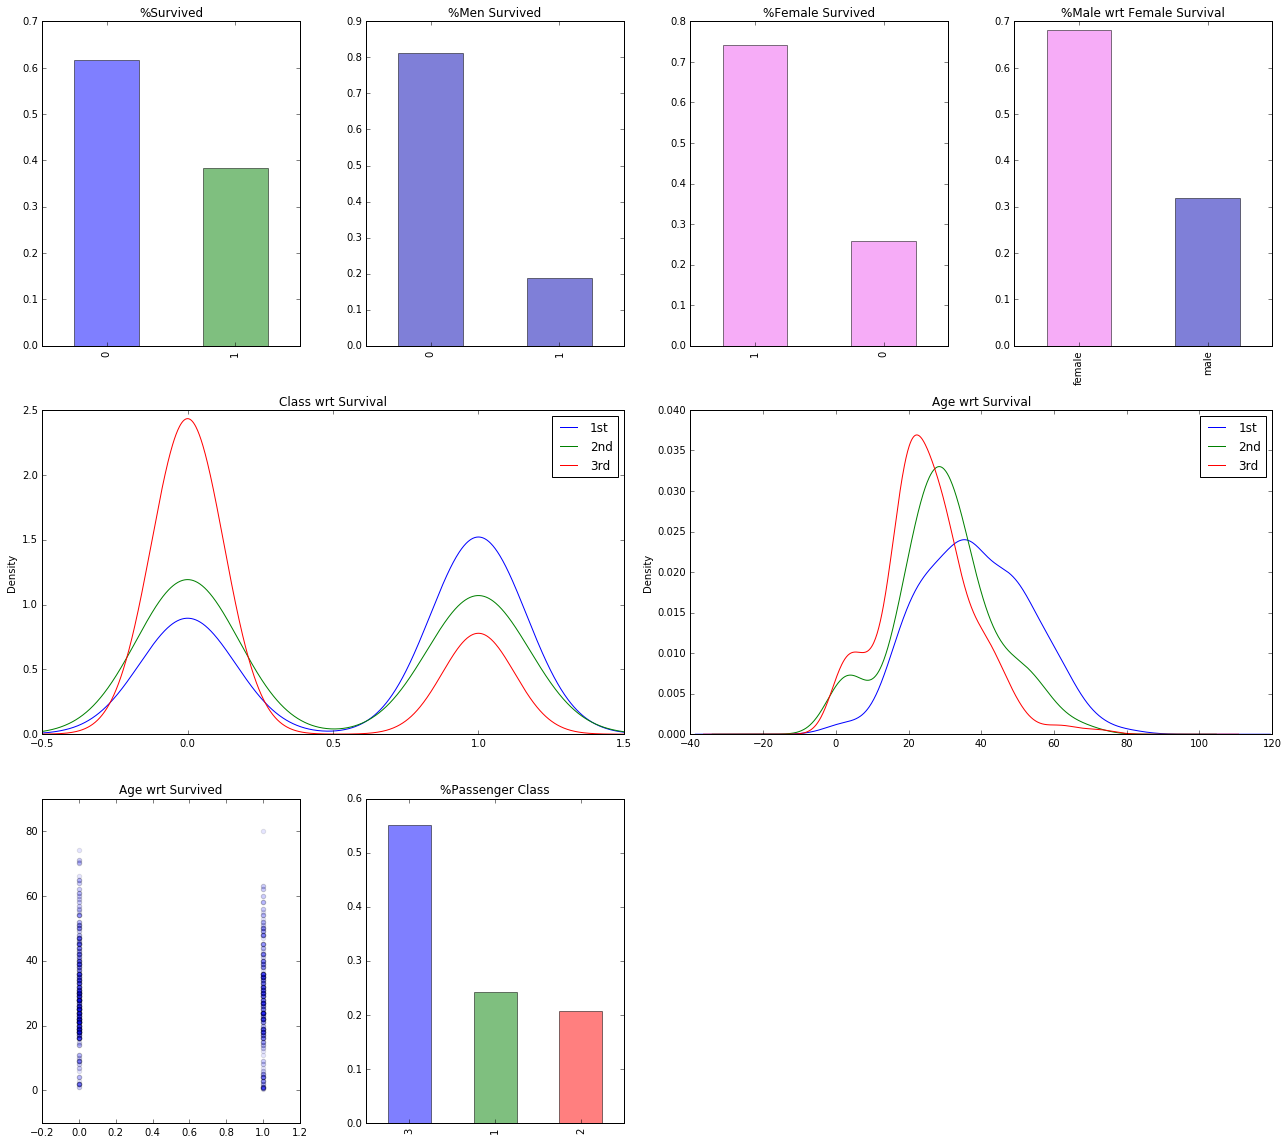

In [2]:
'''
    Next we will add some visualization representing the data value counts 
    of various fields
'''

colors = {
    "male": "#0000B2",
    "female": "#ef5bf0"
}

fig = plt.figure(figsize=(18, 16))

# Total Survival
plt.subplot2grid((3,4), (0,0))
train.Survived.value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.title("%Survived")

# Male Survival
plt.subplot2grid((3,4), (0,1))
train.Survived[train.Sex == "male"].value_counts(normalize=True).plot(kind="bar", alpha=0.5, color=colors["male"])
plt.title("%Men Survived")

# Female Survival
plt.subplot2grid((3,4), (0,2))
train.Survived[train.Sex == "female"].value_counts(normalize=True).plot(kind="bar", alpha=0.5, color=colors["female"])
plt.title("%Female Survived")

# Sex of Survived
plt.subplot2grid((3,4), (0,3))
train.Sex[train.Survived == 1].value_counts(normalize=True).plot(kind="bar", alpha=0.5, color=[colors["female"], colors["male"]])
plt.title("%Male wrt Female Survival")

# Class wrt Survival
plt.subplot2grid((3,4), (1,0), colspan=2)
for x in [1,2,3]:
    train.Survived[train.Pclass == x].plot(kind="kde")
plt.title("Class wrt Survival")
plt.legend(("1st", "2nd", "3rd"))

# Age wrt Survival
plt.subplot2grid((3,4), (1,2), colspan=2)
for x in [1,2,3]:
    train.Age[train.Pclass == x].plot(kind="kde")
plt.title("Age wrt Survival")
plt.legend(("1st", "2nd", "3rd"))

# Embarked From Location
#plt.subplot2grid((3,4), (2,0))
#train.Embarked.value_counts(normalize=True).plot(kind="bar", alpha=0.5)
#plt.title("%Embarked")

# Age wrt Survival
plt.subplot2grid((3,4), (2,0))
plt.scatter(train.Survived, train.Age, alpha=0.1)
plt.title("Age wrt Survived")

# Distribution of Passenger Class type
plt.subplot2grid((3,4), (2,1))
train.Pclass.value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.title("%Passenger Class")




plt.tight_layout()
plt.show()

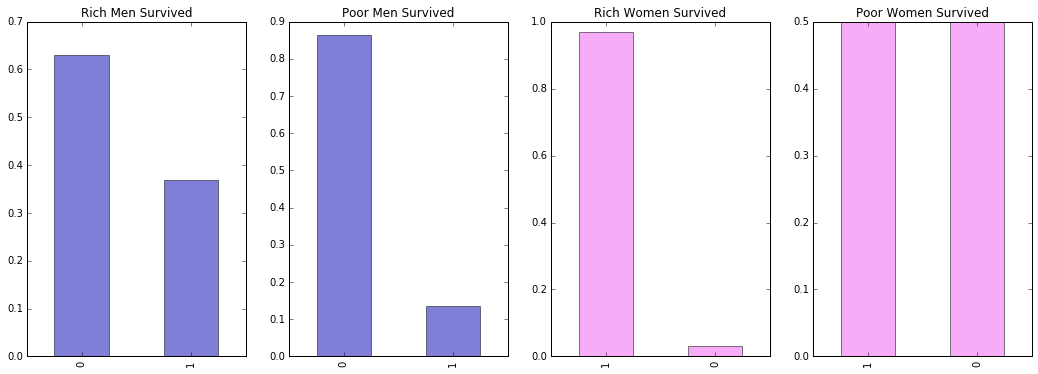

In [3]:
# Rich Male Survival

fig = plt.figure(figsize=(18, 6))
plt.subplot2grid((1,4), (0,0))
train.Survived[(train.Sex == "male") & (train.Pclass == 1)]\
    .value_counts(normalize=True).plot(kind="bar", alpha=0.5, color=colors["male"])
plt.title("Rich Men Survived")

# Poor Male Survival
plt.subplot2grid((1,4), (0,1))
train.Survived[(train.Sex == "male") & (train.Pclass == 3)]\
    .value_counts(normalize=True).plot(kind="bar", alpha=0.5, color=colors["male"])
plt.title("Poor Men Survived")

# Rich Female Survival
plt.subplot2grid((1,4), (0,2))
train.Survived[(train.Sex == "female") & (train.Pclass == 1)]\
    .value_counts(normalize=True).plot(kind="bar", alpha=0.5, color=colors["female"])
plt.title("Rich Women Survived")

# Poor Female Survival
plt.subplot2grid((1,4), (0,3))
train.Survived[(train.Sex == "female") & (train.Pclass == 3)]\
    .value_counts(normalize=True).plot(kind="bar", alpha=0.5, color=colors["female"])
plt.title("Poor Women Survived")


#plt.tight_layout()
plt.show()

In [4]:
def clean_data(data):
    # Cleans data of any non-present values and fills them with the median value 
    data["Fare"] = data["Fare"].fillna(data["Fare"].dropna().median())
    data["Age"] = data["Age"].fillna(data["Age"].dropna().median())
    
    # Replace string values with numbers
    data.loc[data["Sex"] == "male", "Sex"] = 0
    data.loc[data["Sex"] == "female", "Sex"] = 1
    
    # Replace all non-filled values and set numbers for Embarked Location
    data["Embarked"] = data["Embarked"].fillna("S")
    data.loc[data["Embarked"] == "S", "Embarked"] = 0
    data.loc[data["Embarked"] == "C", "Embarked"] = 1
    data.loc[data["Embarked"] == "Q", "Embarked"] = 2
    
    # Map all values to unique integers in cabin
    data["Cabin"] = data["Cabin"].fillna("UNK")
    data["Cabin"] = data["Cabin"].astype('category').cat.codes
    
    return data

train = clean_data(pd.read_csv('./data/train.csv'))

# Shows the new value counts after scrubbing
print(train.shape)
print(train.count())
print(train["Cabin"].value_counts())


    
    

(891, 12)
PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          891
Embarked       891
dtype: int64
147    687
145      4
47       4
63       4
141      3
62       3
90       3
142      3
116      3
58       2
35       2
24       2
101      2
31       2
98       2
32       2
96       2
94       2
34       2
102      2
86       2
36       2
87       2
20       2
40       2
80       2
78       2
75       2
74       2
71       2
      ... 
106      1
105      1
104      1
100      1
64       1
65       1
66       1
67       1
68       1
69       1
70       1
72       1
146      1
76       1
77       1
79       1
81       1
82       1
83       1
84       1
85       1
88       1
89       1
91       1
92       1
93       1
95       1
97       1
99       1
0        1
Name: Cabin, Length: 148, dtype: int64


In [5]:
from sklearn import linear_model, preprocessing, tree, model_selection

feature_names = ["Pclass", "Age", "Sex", "Fare", "Embarked", "SibSp", "Parch"]

target = train["Survived"].values
features = train[feature_names].values

classifier = linear_model.LogisticRegression()
cfit = classifier.fit(features, target)
print('Confidence Without Polynomial transform: %.05f' % cfit.score(features, target))

poly = preprocessing.PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(features)
poly_cfit = classifier.fit(poly_features, target)
print('Confidence With Polynomial transform: %.05f' % poly_cfit.score(poly_features, target))

decision_tree = tree.DecisionTreeClassifier(random_state=1)
dtfit = decision_tree.fit(features, target)
print('Confidence using decision_tree: %.05f' % dtfit.score(features, target))

scores = model_selection.cross_val_score(decision_tree, features, target, scoring='accuracy', cv=50)
print('Confidence using cross_validation: %.05f' % scores.mean())


Confidence Without Polynomial transform: 0.79910
Confidence With Polynomial transform: 0.83614
Confidence using decision_tree: 0.97980
Confidence using cross_validation: 0.79051


0.82443627451


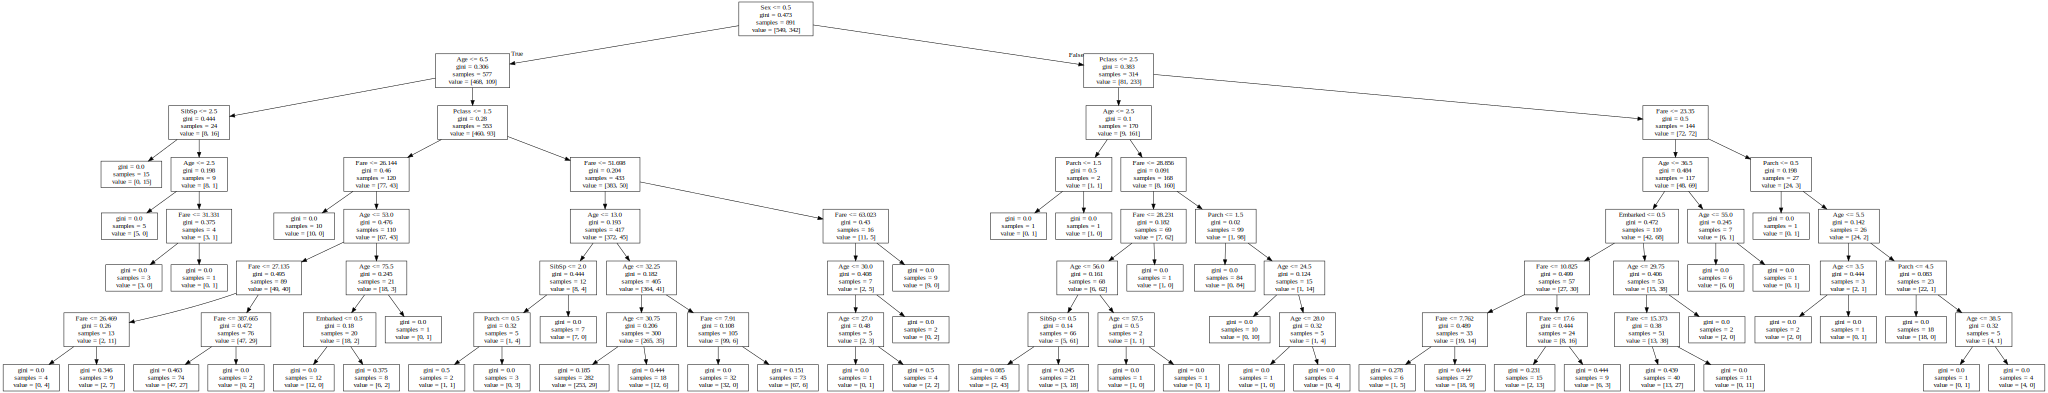

In [6]:
from graphviz import Source
from IPython.display import SVG

generalized_tree = tree.DecisionTreeClassifier(
    random_state=1,
    max_depth=7,
    min_samples_split=2
)
gtfit = generalized_tree.fit(features, target) 
scores = model_selection.cross_val_score(generalized_tree, features, target, scoring='accuracy', cv=50)
print(scores.mean())

graph = Source(tree.export_graphviz(gtfit, feature_names=feature_names, out_file=None))
SVG(graph.pipe(format='svg'))